In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
import streamlit as st
import altair as alt
# Set the title of the web app
st.title("Game Statistics Story")

ModuleNotFoundError: No module named 'streamlit'

In [3]:
# Load the dataset
df = pd.read_csv('../data/SteamCharts.csv', encoding='unicode_escape')
df_st = pd.read_csv('../data/games.csv')
# df = pd.read_csv('./data/SteamCharts.csv', encoding='unicode_escape')

In [4]:
df.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%


In [5]:
df_st.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [6]:
# Clean and format the data
df['year'] = df['year'].astype(str).str.strip()
df['month'] = df['month'].astype(str).str.strip()
df['date'] = pd.to_datetime(df['year'] + " " + df['month'], format="%Y %B", errors='coerce')
df.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc,date
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%,2021-02-01
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%,2021-01-01
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%,2020-12-01
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%,2020-11-01
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%,2020-10-01


In [7]:
df['gamename'].unique().sum()

"Counter-Strike: Global OffensiveDota 2PLAYERUNKNOWN'S BATTLEGROUNDSApex LegendsRustTeam Fortress 2Grand Theft Auto VTom Clancy's Rainbow Six SiegeRocket LeaguePath of ExileFootball Manager 2021ARK: Survival EvolvedDestiny 2Sid Meier's Civilization VIPAYDAY 2Wallpaper EngineWarframeEuro Truck Simulator 2Stardew ValleyGarry's ModDead by DaylightDyson Sphere ProgramWar ThunderCyberpunk 2077Total War: WARHAMMER IIDayZFarming Simulator 19Hearts of Iron IVWorld of Tanks BlitzThe Elder Scrolls OnlineAge of Empires II: Definitive EditionThe Elder Scrolls V: Skyrim Special EditionBrawlhallaUnturnedSpacewar7 Days to DieFootball Manager 2020SMITESid Meier's Civilization VFINAL FANTASY XIV OnlineRimWorldSea of ThievesEuropa Universalis IVCounter-StrikeArma 3EA SPORTS\x99 FIFA 21 Black Desert OnlineNBA 2K20NBA 2K21tModLoaderBloons TD 6FactorioDead CellsDARK SOULS\x99 IIIFallout 4VRChateFootball PES 2021 SEASON UPDATEGunfire RebornStellarisWorld of WarshipsSkul: The Hero SlayerPaladinsAlbion Online

In [8]:
df_mean = df.groupby(['gamename']).mean(['avg_peak_perc'])
df_mean

,avg,gain,peak
gamename,,,
100% Orange Juice,203.529286,3.356024,570.738095
12 is Better Than 6,25.405938,-0.198095,236.312500
140,5.129663,-0.199318,24.483146
60 Seconds!,71.822714,0.075942,218.057143
7 Days to Die,9405.545172,222.675000,17227.505747
...,...,...,...
klocki,5.270000,-0.643455,25.464286
rFactor 2,381.785156,6.679524,911.406250
tModLoader,9959.506000,218.698889,13911.100000


In [9]:
df.columns = df.columns.str.replace(' ', '_')
df_st.columns = df_st.columns.str.replace(' ', '_')
df_st['Release_date'] = pd.to_datetime(df_st['Release_date'])
df_st['Release_year'] = df_st['Release_date'].dt.strftime('%Y')
df_st.head()

,AppID,Name,Release_date,Estimated_owners,Peak_CCU,Required_age,Price,DLC_count,About_the_game,Supported_languages,...,Median_playtime_forever,Median_playtime_two_weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,Release_year
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2008
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2017
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2021
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2020
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2020


In [10]:
df_st = df_st.dropna(subset = ['Name'])
values = {
    "About_the_game": "N/A", 
    "Reviews": "N/A", 
    "Website": "N/A", 
    "Support_url": "N/A", 
    "Support_email": "N/A", 
    "Metacritic_url": "N/A", 
    "Notes": "N/A", 
    "Developers": "N/A", 
    "Publishers": "N/A", 
    "Categories": "Undefined", 
    "Genres": "Undefined", 
    "Tags": "N/A", 
    "Screenshots": "N/A", 
    "Movies": "N/A", 
}
df_st = df_st.fillna(value=values)

In [11]:
values = ['Name', 'DLC_count', 'Release_year']
df_single = df_st[df_st.Categories.str.contains('Single-player')][values]
df_multi = df_st[df_st.Categories.str.contains('Multi-player')][values]
df_dlc = df_st[['Name', 'DLC_count']]

df_single = df_single.rename(columns = {"Name": "gamename"}).set_index('gamename')
df_multi = df_multi.rename(columns = {"Name": "gamename"}).set_index('gamename')
df_dlc = df_dlc.rename(columns = {"Name": "gamename"}).set_index('gamename')

print(df_multi.shape)
print(df_single.shape)
df_multi

(14251, 2)
(69428, 2)


,DLC_count,Release_year
gamename,,
Galactic Bowling,0,2008
Wartune Reborn,0,2021
Cthulhu Realms,1,2016
Alien Breed 3: Descent,0,2010
Steam Squad,1,2016
...,...,...
Azeriom,0,2023
Predefined: A Programming Puzzle Game,0,2023
Trans Ops - Transitional Operations,0,2023


In [16]:
df_single

,DLC_count,Release_year
gamename,,
Galactic Bowling,0,2008
Train Bandit,0,2017
Jolt Project,0,2021
Henosis™,0,2020
Two Weeks in Painland,0,2020
...,...,...
Kinny and the Star Track Puzzle,0,2023
Diebrary,0,2023
Flutter Away,0,2023


In [23]:
drop_multi = df_single.reset_index().merge(df_multi, how='inner')
drop_multi

,gamename,DLC_count,Release_year
0,Galactic Bowling,0,2008
1,Galactic Bowling,0,2008
2,Galactic Bowling,0,2008
3,Galactic Bowling,0,2008
4,Galactic Bowling,0,2008
...,...,...,...
76996709,Call of Duty®: Vanguard,10,2023
76996710,Call of Duty®: Vanguard,10,2023
76996711,Pinball FX,46,2023
76996712,Trinity Trigger,18,2023


In [28]:
# drop_multi.index.values.tolist()
drop_values = drop_multi['gamename'].unique().tolist()
drop_values

['Galactic Bowling',
 'Geneforge 5: Overthrow',
 'Fish Tycoon',
 'Children of the Nile: Enhanced Edition',
 'Multiwinia',
 'Sherlock Holmes - Nemesis',
 'The Wonderful End of the World',
 'Tank Universal',
 'AudioSurf',
 'Space Trader: Merchant Marine',
 "Sid Meier's Civilization IV: Colonization",
 'Heroes of Might & Magic V: Hammers of Fate',
 'Cold Fear™',
 "Mosby's Confederacy",
 "Tom Clancy's Rainbow Six® 3 Gold",
 'Tycoon City: New York',
 'Crysis Warhead®',
 'City Life 2008',
 'Prince of Persia®: The Sands of Time',
 'Everyday Shooter',
 'SPORE™',
 'Silverfall: Earth Awakening',
 'S.T.A.L.K.E.R.: Clear Sky',
 'Prison Tycoon 3™: Lockdown',
 'The Sum of All Fears',
 'Manhunt',
 'X-COM: Enforcer',
 'Precipice of Darkness, Episode Two',
 'Crazy Machines',
 'X-COM: UFO Defense',
 "Tom Clancy's Splinter Cell®",
 '18 Wheels of Steel: American Long Haul',
 'Telltale Texas Hold ‘Em',
 'Bone: The Great Cow Race',
 "Tom Clancy's Rainbow Six® Vegas",
 'RollerCoaster Tycoon® 3: Platinum',
 '

In [29]:
df_single.drop(drop_values)
print(df_multi.shape)
print(df_single.shape)

(14251, 2)
(69428, 2)


In [30]:
df_mean.head()

,avg,gain,peak
gamename,,,
100% Orange Juice,203.529286,3.356024,570.738095
12 is Better Than 6,25.405938,-0.198095,236.312500
140,5.129663,-0.199318,24.483146
60 Seconds!,71.822714,0.075942,218.057143
7 Days to Die,9405.545172,222.675000,17227.505747


In [32]:
join_multi = df_mean.join(df_multi, how='inner')
join_multi['multi-player'] = 1
join_multi

,avg,gain,peak,DLC_count,Release_year,multi-player
gamename,,,,,,
100% Orange Juice,203.529286,3.356024,570.738095,34,2014,1
7 Days to Die,9405.545172,222.675000,17227.505747,0,2013,1
A Hat in Time,273.227833,4.820847,800.333333,6,2017,1
A Way Out,389.623333,35.388750,1362.222222,0,2020,1
APB Reloaded,1357.441058,-20.638641,2519.269231,0,2011,1
...,...,...,...,...,...,...
Zombie Army Trilogy,166.215694,-2.683944,626.513889,0,2015,1
Zombie Panic! Source,109.890769,-4.156311,223.307692,1,2008,1
ibb & obb,30.755122,0.643704,122.085366,1,2014,1


In [33]:
join_single = df_mean.join(df_single, how='inner')
join_single['multi-player'] = 0
join_single

,avg,gain,peak,DLC_count,Release_year,multi-player
gamename,,,,,,
100% Orange Juice,203.529286,3.356024,570.738095,34,2014,0
12 is Better Than 6,25.405938,-0.198095,236.312500,2,2015,0
140,5.129663,-0.199318,24.483146,1,2013,0
60 Seconds!,71.822714,0.075942,218.057143,0,2015,0
7 Days to Die,9405.545172,222.675000,17227.505747,0,2013,0
...,...,...,...,...,...,...
Zup! 2,7.583333,-0.897400,50.313725,1,2016,0
Zup! 3,9.914200,-1.749184,78.060000,1,2017,0
klocki,5.270000,-0.643455,25.464286,0,2016,0


<Axes: xlabel='DLC_count'>

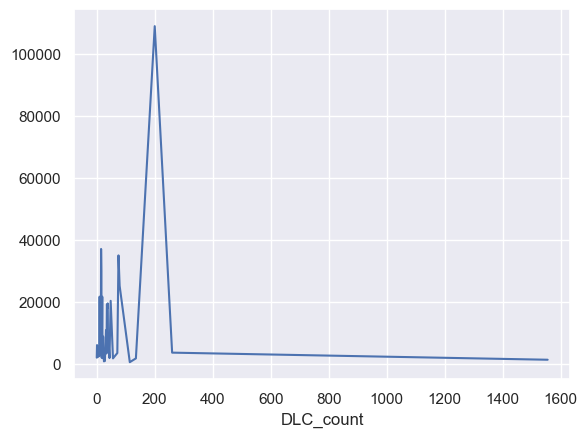

In [34]:
join_single.groupby('DLC_count')['peak'].mean().plot()

In [42]:
DLC_year = join_multi.groupby(['Release_year']).sum()
DLC_year

,avg,gain,peak,DLC_count,multi-player
Release_year,,,,,
1998,400.852885,2.504951,9.572115e+02,1,1
1999,142.555577,-0.031068,3.023173e+02,0,2
2000,15511.606154,-214.057087,2.832855e+04,0,1
2003,166.916346,-2.125146,3.070288e+02,0,1
2004,10464.744038,-262.581748,1.997946e+04,0,4
2006,26176.217212,191.993398,4.845958e+04,0,1
2007,53321.697308,533.483592,8.239744e+04,1,4
2008,1932.195192,-4.015534,3.968808e+03,1,5
2009,13026.143269,11.156505,2.973454e+04,41,8


In [54]:
# df_name = df.groupby(['gamename', 'year', 'month']).sum()
df_name = df.groupby(['gamename', 'month']).mean(['peak'])
df_name.head()

avg       gain        peak
gamename          month                                      
100% Orange Juice April     236.208571  49.331429  595.857143
                  August    213.951429  -6.365714  600.000000
                  December  230.467143  45.268571  695.000000
                  February  198.320000 -22.668571  472.000000
                  January   220.988571  -9.480000  581.428571

Text(0, 0.5, 'Mean of Peak player count')

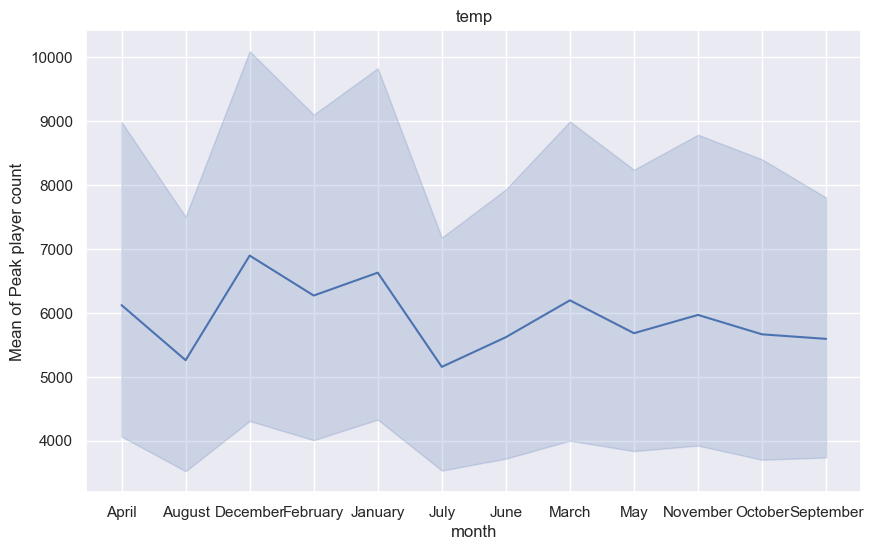

In [74]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_name, x='month', y='peak')
plt.title('temp')
plt.xlabel('month')
plt.ylabel('Mean of Peak player count')
# st.pyplot(plt)

In [ ]:
series_RE = join_single[join_single.index.str.contains('df_multi = df_st[df_st.Categories.str.contains('Multi-player')]')][values]

In [73]:
df_re = df[df['gamename'].str.contains('Resident Evil') == True]


df_re = df_re.groupby(['gamename', 'month']).sum()
df_re
# df_re

C:\Users\po530\AppData\Local\Temp\ipykernel_24704\2775197830.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_re = df_re.groupby(['gamename', 'month']).sum()


avg     gain  peak
gamename                    month                            
Resident Evil               April       676.36   -56.55  1506
                            August      546.36  -175.96  1298
                            December    657.53    87.48  1544
                            February   1450.53  -533.17  4200
                            January    1983.71  1326.18  7054
...                                        ...      ...   ...
Resident Evil Revelations 2 March      2377.51  1174.61  6331
                            May        1260.18  -326.78  3099
                            November   1112.72   206.65  2761
                            October     906.08     7.57  2409
                            September   898.49   -62.18  2198

[119 rows x 3 columns]

In [ ]:
plt.figure(figsize=(10, 6))
join_multi.scatterplot(data=join_single, x='DLC_count', y='peak', label='single-player')

Text(0, 0.5, 'Mean of Peak player count')

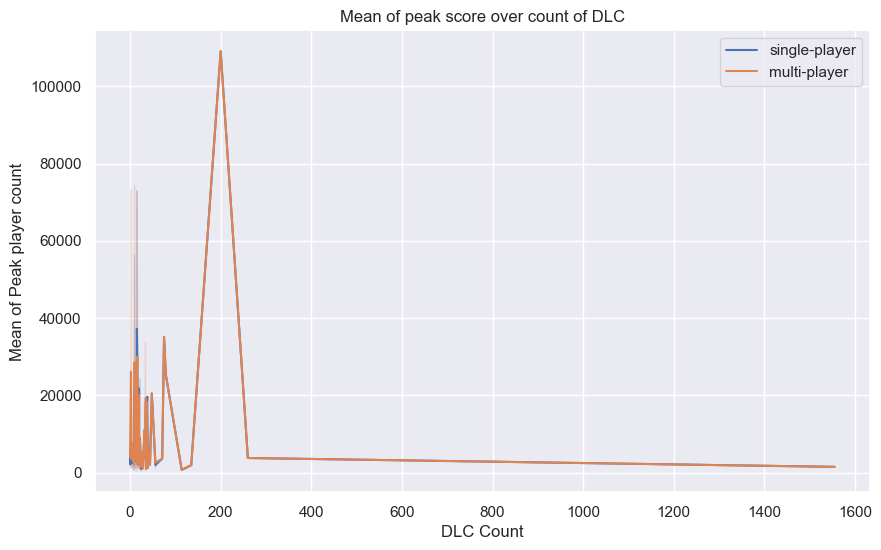

In [75]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=join_single, x='DLC_count', y='peak', label='single-player')
sns.lineplot(data=join_multi, x='DLC_count', y='peak', label='multi-player')
plt.title('Mean of peak score over count of DLC')
plt.xlabel('DLC Count')
plt.ylabel('Mean of Peak player count')

find lifespan 